In [376]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from config import api_key
import pprint as pprint
import time
from citipy import citipy
import numpy as np
import scipy.stats as st

In [377]:
#Create empty list to store values for lat/lon and cities
lat_data = []
cities = []

#create about 2000 lat and long for search
lat_rang = np.random.uniform(-90.000, 90.000, size=1500)
lon_rang = np.random.uniform(-180.000, 180.000, size=1500)
lat_data = zip(lat_rang,lon_rang)

#finding the nearest city
for lat_data in lat_data:
    city = citipy.nearest_city(lat_data[0], lat_data[1]).city_name
    
    #finding the unique value and adding to cities
    if city not in cities:
        cities.append(city)
len(cities)

615

In [378]:
# Perform API Calls

# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name).
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q=" 

#list for storing data
temp_max = []
humdty_list = []
cloud_list = []
windspd_list = []
lat_list = []
lon_list = []
city_name_list = []
city_id_list = []
country_list = []
date_list = []
 
counter = 1

print(f"Beginning Data Retrieval")
print("---"*20)

#loop through the city list and get the json response
for city in cities:
    response = requests.get(query_url + city).json()
    
    #print(json.dumps(response, indent=4, sort_keys=True))
    
    try:
        city_id = response['id']
        city_id_list.append(city_id)
        
        city_name = response['name']
        city_name_list.append(city_name)
        
        country_name = response['sys']['country']
        country_list.append(country_name)
        
        lon = response['coord']['lon']
        lon_list.append(lon)
        
        lat = response['coord']['lat']
        lat_list.append(lat)
        
        temp = response['main']['temp_max']
        temp_max.append(temp)
        
        humdty = response['main']['humidity']
        humdty_list.append(humdty)
        
        cloud = response['clouds']['all']
        cloud_list.append(cloud)
        
        wind_spd = response['wind']['speed']
        windspd_list.append(wind_spd)
        
        date = response["dt"]
        date_list.append(date)
        
        print(f"Processing Record: {counter} | of Set | {counter} | City id: {city_name}")
        counter += 1
    except:
        print("Data unavailable")
        
print("--"*20)
print(f"Data Retrieval Complete")
print("--"*20)

Beginning Data Retrieval
------------------------------------------------------------
Processing Record: 1 | of Set | 1 | City id: Tsabong
Processing Record: 2 | of Set | 2 | City id: Barrow
Processing Record: 3 | of Set | 3 | City id: Bela
Data unavailable
Data unavailable
Processing Record: 4 | of Set | 4 | City id: Arraial do Cabo
Processing Record: 5 | of Set | 5 | City id: Avarua
Processing Record: 6 | of Set | 6 | City id: Fortuna
Processing Record: 7 | of Set | 7 | City id: Carnarvon
Processing Record: 8 | of Set | 8 | City id: Chui
Processing Record: 9 | of Set | 9 | City id: Kingston
Processing Record: 10 | of Set | 10 | City id: Mataura
Processing Record: 11 | of Set | 11 | City id: Rājpīpla
Processing Record: 12 | of Set | 12 | City id: Rikitea
Processing Record: 13 | of Set | 13 | City id: Udimskiy
Processing Record: 14 | of Set | 14 | City id: Teguise
Processing Record: 15 | of Set | 15 | City id: Bluff
Data unavailable
Data unavailable
Processing Record: 16 | of Set | 16 

Processing Record: 138 | of Set | 138 | City id: Kaitangata
Processing Record: 139 | of Set | 139 | City id: Itacoatiara
Processing Record: 140 | of Set | 140 | City id: Emba
Processing Record: 141 | of Set | 141 | City id: Qaanaaq
Processing Record: 142 | of Set | 142 | City id: San Vicente
Processing Record: 143 | of Set | 143 | City id: Yellowknife
Processing Record: 144 | of Set | 144 | City id: Carballo
Processing Record: 145 | of Set | 145 | City id: Coquimbo
Processing Record: 146 | of Set | 146 | City id: Port Lincoln
Processing Record: 147 | of Set | 147 | City id: Vinukonda
Processing Record: 148 | of Set | 148 | City id: Rodolfo Sánchez Taboada
Processing Record: 149 | of Set | 149 | City id: Turhal
Processing Record: 150 | of Set | 150 | City id: Susanville
Processing Record: 151 | of Set | 151 | City id: Saldanha
Processing Record: 152 | of Set | 152 | City id: Nanga Eboko
Processing Record: 153 | of Set | 153 | City id: Sulangan
Processing Record: 154 | of Set | 154 | Cit

Processing Record: 276 | of Set | 276 | City id: Santa Isabel Rio Negro
Processing Record: 277 | of Set | 277 | City id: Agüimes
Data unavailable
Processing Record: 278 | of Set | 278 | City id: Karasjok
Processing Record: 279 | of Set | 279 | City id: Acapulco de Juárez
Processing Record: 280 | of Set | 280 | City id: Racine
Processing Record: 281 | of Set | 281 | City id: Auki
Processing Record: 282 | of Set | 282 | City id: Lesnoye
Processing Record: 283 | of Set | 283 | City id: Zyryanka
Processing Record: 284 | of Set | 284 | City id: Hokitika
Processing Record: 285 | of Set | 285 | City id: Itaituba
Processing Record: 286 | of Set | 286 | City id: Laje
Processing Record: 287 | of Set | 287 | City id: Along
Processing Record: 288 | of Set | 288 | City id: Orlik
Processing Record: 289 | of Set | 289 | City id: Moryakovskiy Zaton
Processing Record: 290 | of Set | 290 | City id: São Filipe
Processing Record: 291 | of Set | 291 | City id: Nanortalik
Processing Record: 292 | of Set | 2

Processing Record: 414 | of Set | 414 | City id: Pringsewu
Processing Record: 415 | of Set | 415 | City id: Kathu
Processing Record: 416 | of Set | 416 | City id: Scottsbluff
Data unavailable
Data unavailable
Processing Record: 417 | of Set | 417 | City id: Kalmunai
Processing Record: 418 | of Set | 418 | City id: Tiruchirappalli
Data unavailable
Processing Record: 419 | of Set | 419 | City id: Pāvilosta
Processing Record: 420 | of Set | 420 | City id: Jammu
Processing Record: 421 | of Set | 421 | City id: Rajshahi
Processing Record: 422 | of Set | 422 | City id: Athabasca
Processing Record: 423 | of Set | 423 | City id: Ossora
Processing Record: 424 | of Set | 424 | City id: Parrita
Processing Record: 425 | of Set | 425 | City id: Half Moon Bay
Processing Record: 426 | of Set | 426 | City id: Matara
Processing Record: 427 | of Set | 427 | City id: Pabianice
Data unavailable
Processing Record: 428 | of Set | 428 | City id: Yaan
Processing Record: 429 | of Set | 429 | City id: Forestvil

Processing Record: 551 | of Set | 551 | City id: Sawtell
Processing Record: 552 | of Set | 552 | City id: Mayya
Processing Record: 553 | of Set | 553 | City id: Colorines
Processing Record: 554 | of Set | 554 | City id: George
Processing Record: 555 | of Set | 555 | City id: Honningsvåg
Processing Record: 556 | of Set | 556 | City id: Yar-Sale
Processing Record: 557 | of Set | 557 | City id: Devils Lake
Processing Record: 558 | of Set | 558 | City id: Qasigiannguit
Processing Record: 559 | of Set | 559 | City id: Abhā
Processing Record: 560 | of Set | 560 | City id: Xai-Xai
Processing Record: 561 | of Set | 561 | City id: Fort Madison
Processing Record: 562 | of Set | 562 | City id: Klyuchi
Processing Record: 563 | of Set | 563 | City id: Boa Vista
Processing Record: 564 | of Set | 564 | City id: Sambava
Processing Record: 565 | of Set | 565 | City id: San Carlos
Processing Record: 566 | of Set | 566 | City id: Baillif
Processing Record: 567 | of Set | 567 | City id: Kumluca
Data unava

In [379]:
# Convert Raw Data to DataFrame

# Export the city data into a .csv.
# Display the DataFrame

city_weather = {"City": city_name_list,
                "Lat": lat_list,
                "Lng": lon_list,
                "Max Temp": temp_max,
                "Humidity": humdty_list,
                "Cloudiness": cloud_list,
                "Wind Speed": windspd_list,
                "Country": country_list,
                "Date": date_list }
city_weather_df = pd.DataFrame(city_weather)

city_weather_df

city_weather_df.style.set_properties(**{'text-align': 'left','border-color':'Black','border-width':'thin','border-style':'solid'}) \
                  .set_table_styles([{'selector':'th','props':[('border','thin solid'),('text-align','left')]}])




In [380]:
#Export the city data into a .csv.
city_weather_df.to_csv("Output_csv/cities.csv", index=False, header=True)

In [381]:
#Calculating mean,median, std, min, 25%, 50%, 75%, max
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,20.785421,17.848579,61.568930,70.933333,48.475439,8.043561,1.602653e+09
std,32.957945,90.307497,18.341881,21.364584,38.377740,5.814330,7.242610e+01
min,-54.800000,-179.170000,12.720000,8.000000,0.000000,0.450000,1.602652e+09
25%,-5.877500,-60.572500,46.400000,59.250000,5.000000,3.420000,1.602653e+09
50%,25.815000,21.850000,64.455000,75.000000,40.000000,6.930000,1.602653e+09
75%,47.905000,94.052500,77.000000,88.000000,90.000000,10.822500,1.602653e+09
max,78.220000,179.320000,99.230000,100.000000,100.000000,40.260000,1.602653e+09


In [382]:
# convert unix time 
date_time = city_weather_df["Date"][0]
date_time_converted = time.strftime("%m/%d/%y", time.localtime(date_time))
date_time_converted

'10/14/20'

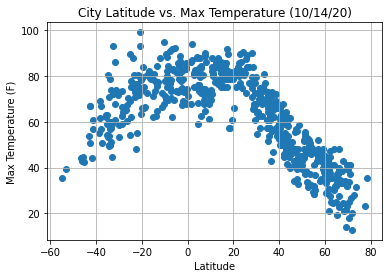

The above plot shows that as you approach latitude 0 the temperature hits the highest


In [383]:
#Plotting the Data

#Latitude vs. Temperature Plot
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"],marker="o")
plt.title(f"City Latitude vs. Max Temperature ({date_time_converted})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("Images/LatitudevsTemperature.png")
plt.show()

print(f"The above plot shows that as you approach latitude 0 the temperature hits the highest")

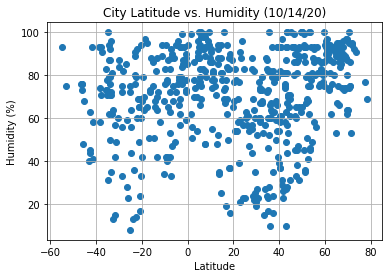

There's no trend between Humidty and Latitude


In [384]:
#Latitude vs. Humidity Plot
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"],marker="o")
plt.title(f"City Latitude vs. Humidity ({date_time_converted})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("Images/LatitudevsHumidity.png")
plt.show()

print(f"There's no trend between Humidty and Latitude")

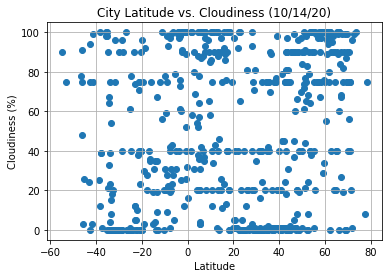

There's no trend between Cloudiness and Latitude


In [385]:
#Latitude vs. Cloudiness Plot
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"],marker="o")
plt.title(f"City Latitude vs. Cloudiness ({date_time_converted})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("Images/LatitudevsCloudiness.png")
plt.show()

print(f"There's no trend between Cloudiness and Latitude")

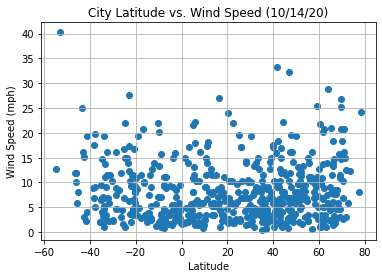

There's no trend between Windspeed and Latitude


In [386]:
#Latitude vs. Wind Speed Plot
plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"],marker="o")
plt.title(f"City Latitude vs. Wind Speed ({date_time_converted})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("Images/LatitudevsWindspeed.png")
plt.show()

print(f"There's no trend between Windspeed and Latitude")

In [387]:
#Linear regression
north_hemisphere = city_weather_df.loc[city_weather_df["Lat"]>=0]
south_hemisphere = city_weather_df.loc[city_weather_df["Lat"]<0]

The r-squared is: -0.8897096333248898
The Northern Hemisphere gets hotter as you approach closer to latitude 0. Strong Correlation


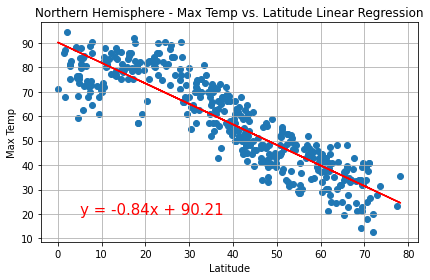

In [388]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
correlation = st.pearsonr(x_values,y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,20),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid()
plt.tight_layout()
plt.savefig("Images/nth_lat_temp_regress.png")
print(f"The r-squared is: {rvalue}")
print(f"The Northern Hemisphere gets hotter as you approach closer to latitude 0. Strong Correlation")

The r-squared is: 0.6772344899451289
The Southern Hemisphere gets hotter as you approach closer to latitude 0


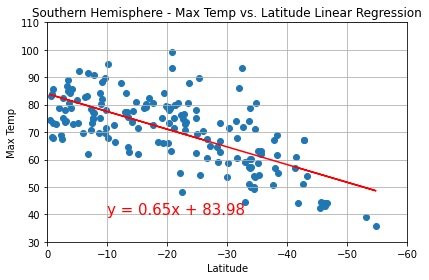

In [389]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
correlation = st.pearsonr(x_values,y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-10,40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.ylim(30, 110)
plt.xlim(0, -60)
plt.grid()
plt.tight_layout()
plt.savefig("Images/sth_lat_temp_regress.png")
print(f"The r-squared is: {rvalue}")
print(f"The Southern Hemisphere gets hotter as you approach closer to latitude 0")

The r-squared is: 0.14024128404962255
The Norhtern Hemisphere gets humid as you move away from latitude 0, poisitive correlation


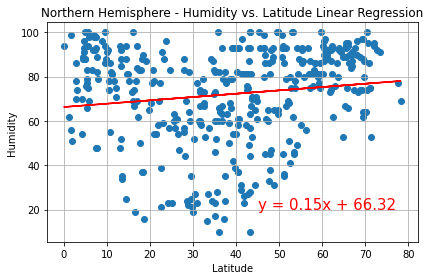

In [393]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
correlation = st.pearsonr(x_values,y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.tight_layout()
plt.savefig("Images/nth_lat_humidity_regress.png")
print(f"The r-squared is: {rvalue}")
print(f"The Norhtern Hemisphere gets humid as you move away from latitude 0, poisitive correlation")

The r-squared is: 0.13438375446665893
The Southern Hemisphere humidity reduces as you move closer to latitude 0, a negative correlation


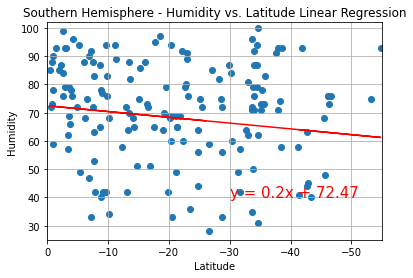

In [394]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
correlation = st.pearsonr(x_values,y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.ylim(25, 102)
plt.xlim(0, -55)
plt.grid()
plt.savefig("Images/sth_lat_humidity_regress.png")
print(f"The r-squared is: {rvalue}")
print(f"The Southern Hemisphere humidity reduces as you move closer to latitude 0, a negative correlation")

The r-squared is: 0.16327328067815092
No visible correlation as the data is spread across the grid


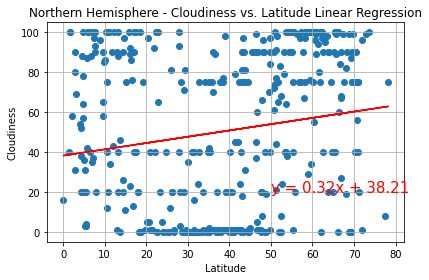

In [395]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
correlation = st.pearsonr(x_values,y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.tight_layout()
plt.savefig("Images/nth_lat_cloudiness_regress.png")
print(f"The r-squared is: {rvalue}")
print(f"No visible correlation as the data is spread across the grid")

The r-squared is: 0.1287233265744119
The Southern Hemisphere is cloudy closer to latitude 0


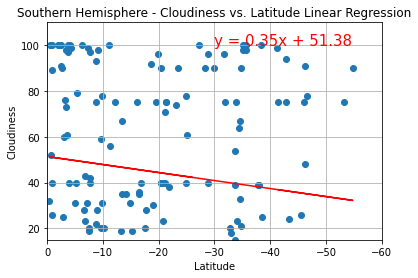

In [396]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
correlation = st.pearsonr(x_values,y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,100),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.ylim(15, 110)
plt.xlim(0, -60)
plt.grid()
plt.savefig("Images/sth_lat_cloudiness_regress.png")
print(f"The r-squared is: {rvalue}")
print(f"The Southern Hemisphere is cloudy closer to latitude 0")

The r-squared is: 0.15818772306957404
We can see in the below plot as you move away from latitude 0 and the wind speed increase


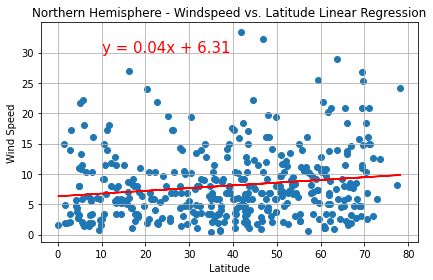

In [402]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
correlation = st.pearsonr(x_values,y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.title("Northern Hemisphere - Windspeed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.tight_layout()
plt.savefig("Images/nth_lat_windspeed_regress.png")
print(f"The r-squared is: {rvalue}")
print(f"We can see in the below plot as you move away from latitude 0 and the wind speed increase" )

The r-squared is: -0.2711855072779645
The Southern Hemisphere windspeed increases as you move away from latitude 0


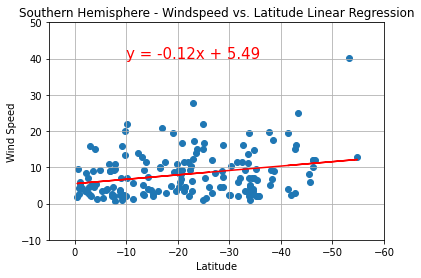

In [403]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
correlation = st.pearsonr(x_values,y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-10,40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Windspeed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.ylim(-10, 50)
plt.xlim(5, -60)
plt.grid()
plt.savefig("Images/sth_lat_windspeed_regress.png")
print(f"The r-squared is: {rvalue}")
print(f"The Southern Hemisphere windspeed increases as you move away from latitude 0")